# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Genesis Adam\
_Student No._: 2019-05415\
_Section_: THY-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 18/02/2024 - 4:55 AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: GENESIS ADAM D. MENDOZA**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "C:\\Users\\PC\\Desktop\\Acads Stuff\\A.Y. 2023-2024\\2nd Sem\\App Physics 157\\App_Physics_157\\Lab Assignments\\Datasets\\"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [ ]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')
data.dtype

dtype([('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [ ]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [ ]:
target_cols = ['class']

def get_features_targets(array):
    feat_cols = [col for col in array.dtype.names if col not in target_cols]
    features = np.array([array[col] for col in feat_cols]).transpose()
    targets = array[[col for col in target_cols]]

    return features, targets

features, targets = get_features_targets(data)
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)


Features shape: (780, 16)
Targets shape: (780,)


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def predict_class(array):
    x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8, random_state = 0)
    model = DecisionTreeClassifier(random_state = 0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred, y_test

predicted_class, actual_class = predict_class(data)

for i in np.arange(10):
   print((i, predicted_class[i], actual_class[i]))

(0, ('spiral',), ('spiral',))
(1, ('elliptical',), ('elliptical',))
(2, ('merger',), ('merger',))
(3, ('merger',), ('merger',))
(4, ('elliptical',), ('elliptical',))
(5, ('elliptical',), ('elliptical',))
(6, ('spiral',), ('spiral',))
(7, ('spiral',), ('spiral',))
(8, ('merger',), ('merger',))
(9, ('spiral',), ('spiral',))


#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

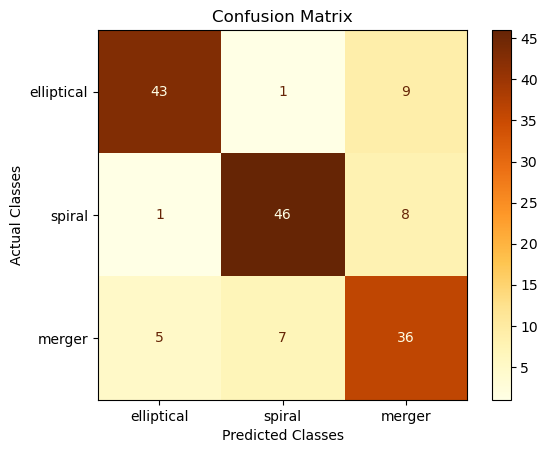

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predicted = [predicted_class[i][0] for i in range(len(predicted_class))]
actual = [actual_class[i][0] for i in range(len(actual_class))]
conf_mat = confusion_matrix(actual, predicted, labels = ['elliptical', 'spiral', 'merger'])

conf_mat_plot = ConfusionMatrixDisplay(conf_mat, display_labels= ['elliptical', 'spiral', 'merger'])
conf_mat_plot.plot(cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [ ]:
bool_arr = [actual[i] == predicted[i] for i in range(len(actual))]
correct_count = np.sum(bool_arr)
total_count = len(actual)
print('The test accuracy is '+str(100*correct_count/total_count)+'%')

The test accuracy is 80.12820512820512%


#### Extra

Can we improve this?

For a maximum depth of 7, the accuracy is 83.33%.


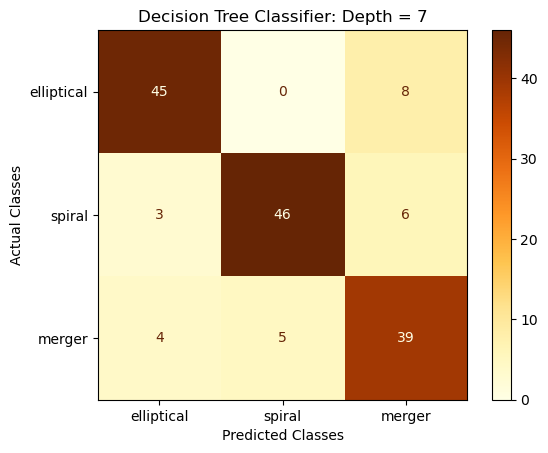

In [ ]:
from sklearn.model_selection import train_test_split

def predict_class(array, n):
    x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8, random_state = 0)
    model = DecisionTreeClassifier(max_depth = n, random_state = 0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred, y_test

def optimal_depth(array):
    n_accu = {}
    for n in range(1, 100, 1):
        predicted_class, actual_class = predict_class(array, n)
        predicted = [predicted_class[i][0] for i in range(len(predicted_class))]
        actual = [actual_class[i][0] for i in range(len(actual_class))]
        bool_arr = [actual[i] == predicted[i] for i in range(len(actual))]
        correct_count = np.sum(bool_arr)
        total_count = len(actual)
        n_accu[n] = 100*correct_count/total_count
    
    max_n = max(n_accu, key = n_accu.get)
    return max_n, n_accu[max_n]

n_val, accu = optimal_depth(data)        
print('For a maximum depth of {}, the accuracy is {:.2f}%.'.format(n_val, accu))

predicted_class, actual_class = predict_class(data, n_val)
predicted = [predicted_class[i][0] for i in range(len(predicted_class))]
actual = [actual_class[i][0] for i in range(len(actual_class))]

conf_mat = confusion_matrix(actual, predicted, labels = ['elliptical', 'spiral', 'merger'])
conf_mat_plot = ConfusionMatrixDisplay(conf_mat, display_labels= ['elliptical', 'spiral', 'merger'])
conf_mat_plot.plot(cmap='YlOrBr')
plt.title('Decision Tree Classifier: Depth = {}'.format(n_val))
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

For 23 nodes, the accuracy is 89.74%.


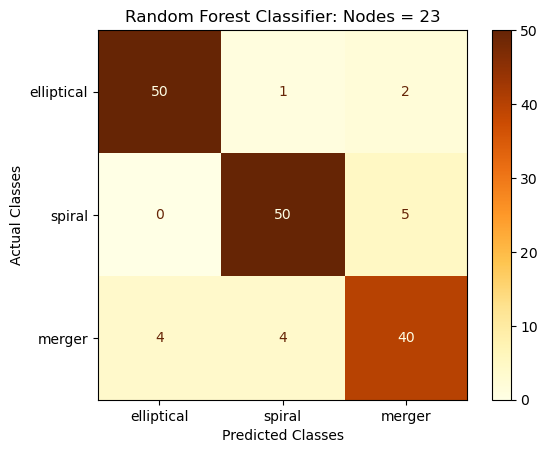

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def predict_class(array, n):
    x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8, random_state = 0)
    model = RandomForestClassifier(n_estimators = n, random_state = 0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred, y_test

def optimal_estimator(array):
    n_accu = {}
    for n in range(1, 100, 1):
        predicted_class, actual_class = predict_class(array, n)
        predicted = [predicted_class[i][0] for i in range(len(predicted_class))]
        actual = [actual_class[i][0] for i in range(len(actual_class))]
        bool_arr = [actual[i] == predicted[i] for i in range(len(actual))]
        correct_count = np.sum(bool_arr)
        total_count = len(actual)
        n_accu[n] = 100*correct_count/total_count
    
    max_n = max(n_accu, key = n_accu.get)
    return max_n, n_accu[max_n]

n_val, accu = optimal_estimator(data)        
print('For {} nodes, the accuracy is {:.2f}%.'.format(n_val, accu))

predicted_class, actual_class = predict_class(data, n_val)
predicted = [predicted_class[i][0] for i in range(len(predicted_class))]
actual = [actual_class[i][0] for i in range(len(actual_class))]

conf_mat = confusion_matrix(actual, predicted, labels = ['elliptical', 'spiral', 'merger'])
conf_mat_plot = ConfusionMatrixDisplay(conf_mat, display_labels= ['elliptical', 'spiral', 'merger'])
conf_mat_plot.plot(cmap='YlOrBr')
plt.title('Random Forest Classifier: Nodes = {}'.format(n_val))
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()